<a href="https://colab.research.google.com/github/alwaystegar24/data-mining-tegar/blob/main/%5BClustering%5D_Submission_Akhir_BMLP_Tegar_Hibatullah_Ferniko.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA



# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/data_costumer.csv'

try:
    df = pd.read_csv(file_path)
    print("Dataset loaded successfully.")
    print(df.head())
except FileNotFoundError:
    print(f"Error: File not found at {file_path}. Please check the file path.")
except pd.errors.ParserError:
    print(f"Error: Unable to parse the CSV file at {file_path}. Please check the file format.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dataset loaded successfully.
   CustomerID  Gender  Age  Annual Income ($)  Spending Score (1-100)  \
0           1    Male   19              15000                      39   
1           2    Male   21              35000                      81   
2           3  Female   20              86000                       6   
3           4  Female   23              59000                      77   
4           5  Female   31              38000                      40   

      Profession  Work Experience  Family Size  
0     Healthcare                1            4  
1       Engineer                3            3  
2       Engineer                1            1  
3         Lawyer                0            2  
4  Entertainment                2            6  


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

(2000, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB
None

Jumlah data yang hilang di setiap kolom:
 CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

Jumlah data yang h

<ipython-input-44-f07c20113953>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
<ipython-input-44-f07c20113953>:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

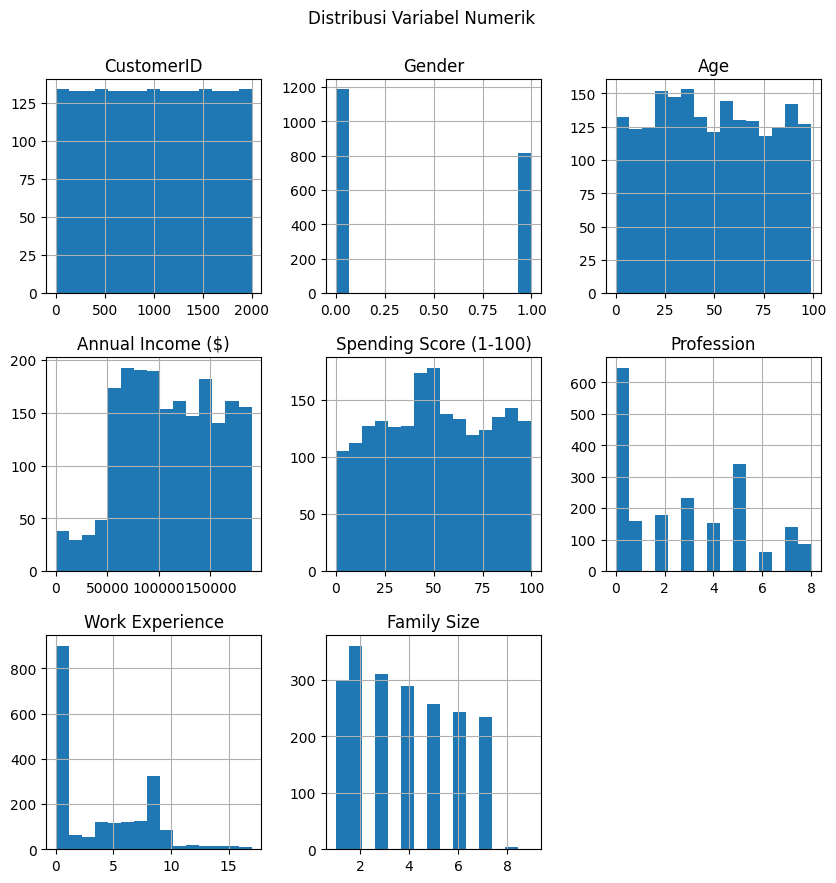

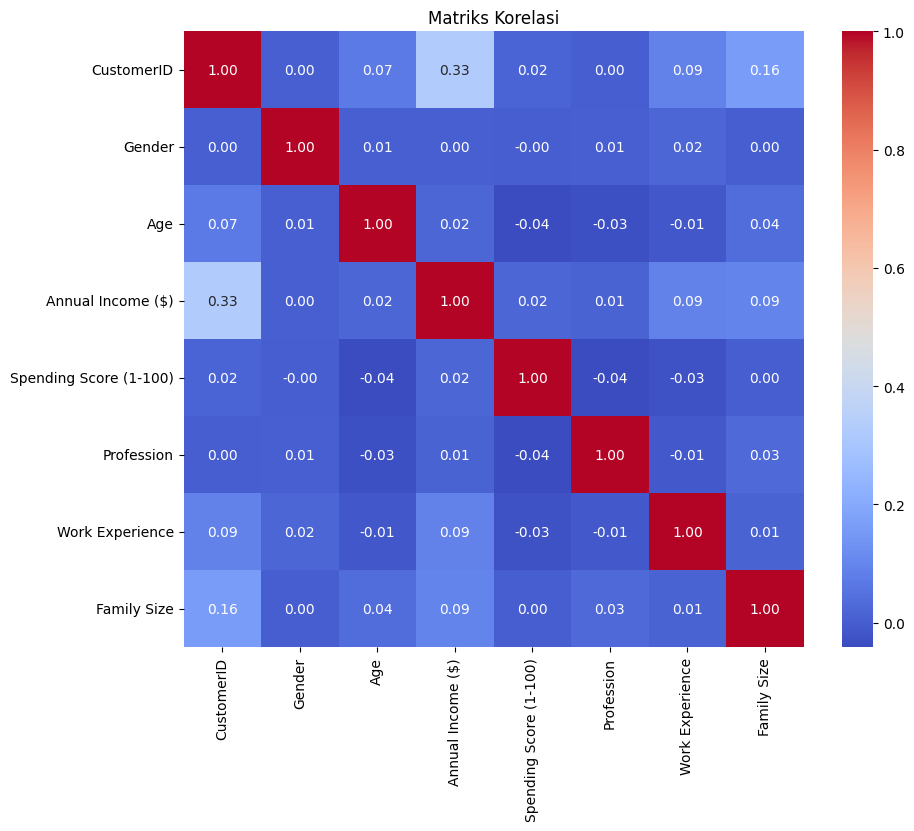

Kolom dalam dataset:
 Index(['CustomerID', 'Gender', 'Age', 'Annual Income ($)',
       'Spending Score (1-100)', 'Profession', 'Work Experience',
       'Family Size'],
      dtype='object')


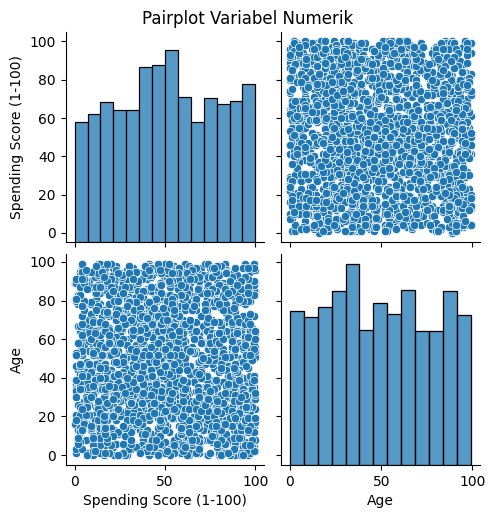

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Memahami Struktur Data
print(df.shape)
print(df.info())

# Menangani Data yang Hilang
print("\nJumlah data yang hilang di setiap kolom:\n", df.isnull().sum())

# Mengisi data yang hilang
for col in df.select_dtypes(include=np.number):
    df[col].fillna(df[col].mean(), inplace=True)
for col in df.select_dtypes(include='object'):
    df[col].fillna(df[col].mode()[0], inplace=True)

# Memastikan tidak ada data yang hilang
print("\nJumlah data yang hilang setelah penanganan:\n", df.isnull().sum())

# Encoding data kategorikal untuk analisis korelasi
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    df[col] = df[col].astype('category').cat.codes

# Analisis Distribusi dan Korelasi
print("\nStatistik deskriptif untuk data numerik:\n", df.describe())

# Visualisasi distribusi numerik
df.hist(figsize=(10, 10), bins=15)
plt.suptitle("Distribusi Variabel Numerik", y=0.95)
plt.show()

# Korelasi antar variabel numerik
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriks Korelasi")
plt.show()

# Visualisasi Data
# Diagram batang untuk variabel kategorikal
for col in df.select_dtypes(include='int'):
    if col in categorical_cols:
        plt.figure(figsize=(8, 6))
        sns.countplot(x=df[col])
        plt.title(f"Distribusi {col}")
        plt.xticks(rotation=45)
        plt.show()

# Pastikan nama kolom sesuai dengan dataset
print("Kolom dalam dataset:\n", df.columns)

# Ganti selected_cols dengan nama kolom yang benar
selected_cols = ['Annual Income (k$)', 'Spending Score (1-100)', 'Age']  #
selected_cols = [col for col in selected_cols if col in df.columns]

if selected_cols:
    sns.pairplot(df[selected_cols])
    plt.suptitle("Pairplot Variabel Numerik", y=1.02)
    plt.show()
else:
    print("Kolom yang dipilih untuk pairplot tidak ditemukan dalam dataset.")



# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [ ]:
df.drop_duplicates(inplace=True)

numerical_cols = df.select_dtypes(include=np.number).columns
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le


df['Age_Group'] = pd.cut(df['Age'], bins=[18, 25, 35, 50, 100], labels=['18-24', '25-34', '35-49', '50+'])

df = pd.get_dummies(df, columns=['Age_Group'], prefix=['Age'])

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)

kmeans.fit(df)

df['Cluster'] = kmeans.labels_

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

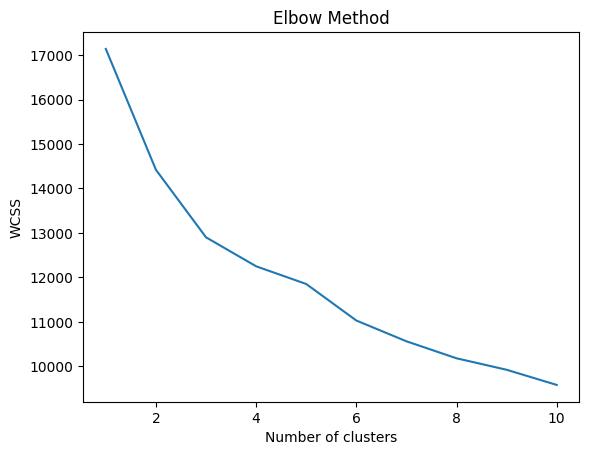

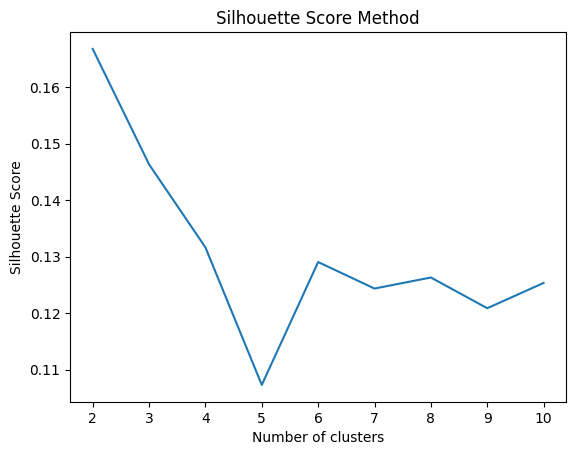

Silhouette Scores: [0.16673718770056, 0.1463149075997617, 0.13162556680545956, 0.10729478598296174, 0.12903362731276471, 0.12434456106950041, 0.1262994857842317, 0.12086477374909331, 0.12533582221727102]


In [ ]:
 #Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Silhouette Score
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df)
    silhouette_avg = silhouette_score(df, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Score Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

print("Silhouette Scores:", silhouette_scores)

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

X = df.drop('Age', axis=1)
y = df['Family Size']

k = 5
selector = SelectKBest(score_func=f_classif, k=k)
X_new = selector.fit_transform(X, y)

selected_feature_names = X.columns[selector.get_support()]


df_selected = pd.DataFrame(X_new, columns=selected_feature_names)
df_selected['Cluster'] = y



kmeans_selected = KMeans(n_clusters=3, random_state=42)
kmeans_selected.fit(df_selected.drop('Cluster', axis=1))
df_selected['Cluster_Selected'] = kmeans_selected.labels_

silhouette_avg_selected = silhouette_score(df_selected.drop(['Cluster','Cluster_Selected'], axis=1), df_selected['Cluster_Selected'])
print(f"Silhouette Score (after feature selection): {silhouette_avg_selected}")


silhouette_avg_original = silhouette_score(df.drop('Cluster', axis=1), df['Cluster'])
print(f"Silhouette Score (original): {silhouette_avg_original}")


print(f"\nComparison:")
print(f"Original Silhouette Score: {silhouette_avg_original}")
print(f"Silhouette Score after Feature Selection: {silhouette_avg_selected}")


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [ 7  8  9 10] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Silhouette Score (after feature selection): 0.22430455144574513
Silhouette Score (original): 0.10282800715322853

Comparison:
Original Silhouette Score: 0.10282800715322853
Silhouette Score after Feature Selection: 0.22430455144574513


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

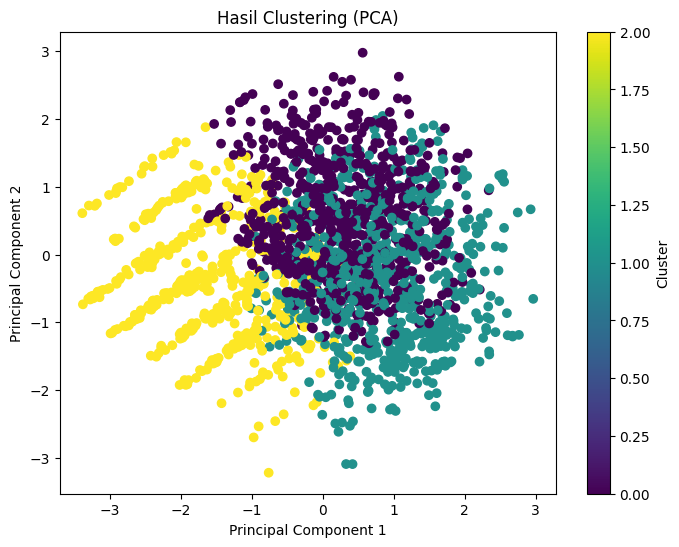

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer



imputer = SimpleImputer(strategy='mean')
df_selected_imputed = pd.DataFrame(imputer.fit_transform(df_selected.drop('Cluster_Selected', axis=1)), columns=df_selected.drop('Cluster_Selected', axis=1).columns)

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_selected_imputed)

plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df_selected['Cluster_Selected'], cmap='viridis')
plt.title('Hasil Clustering (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?


Karakteristik Cluster 2:
  - CustomerID:
    Mean: -1.1063500472769778
    Median: -1.2617991710388332
    Std Dev: 0.506884450177783


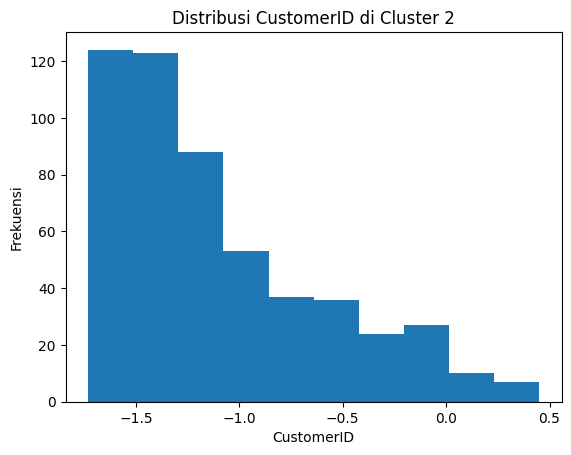

  - Gender:
    Mean: 0.048856336279576876
    Median: -0.8284567827047125
    Std Dev: 1.0089771307291993


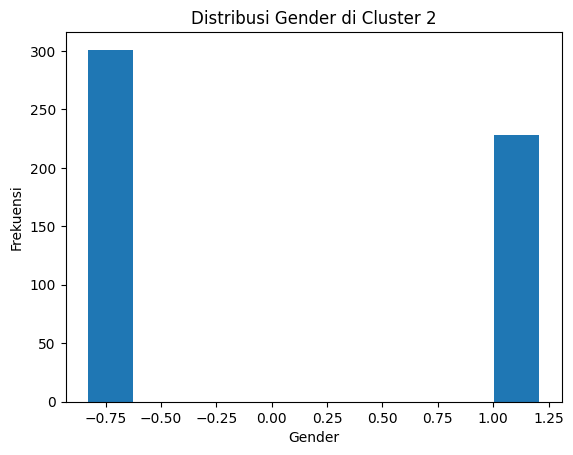

  - Annual Income ($):
    Mean: -0.9877755888248102
    Median: -0.9377564593523405
    Std Dev: 0.6575280496409319


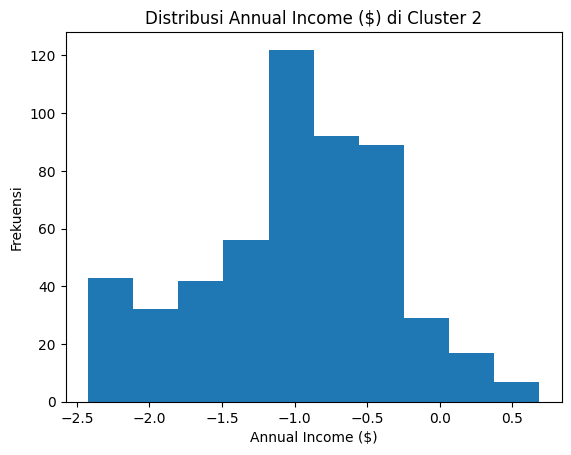

  - Family Size:
    Mean: -0.5224547936449006
    Median: -0.3900508840392152
    Std Dev: 0.6648513153255997


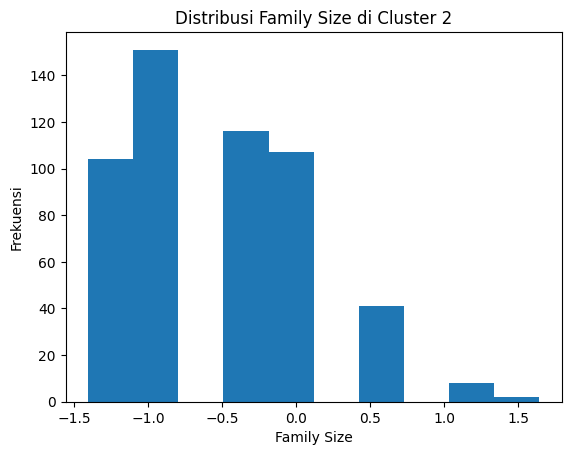

  - Cluster:
    Mean: -0.27854405612634636
    Median: -0.3900508840392152
    Std Dev: 0.8587108006968184


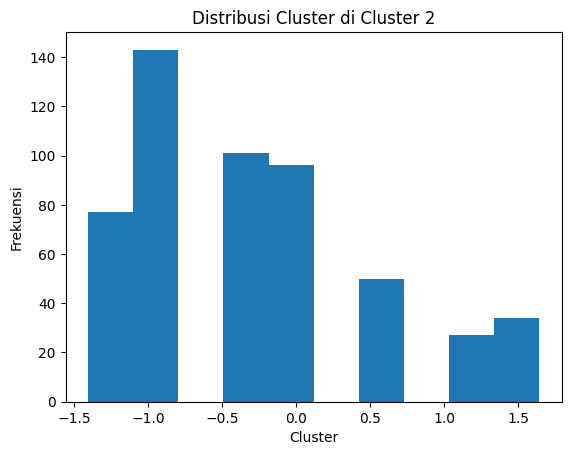


Karakteristik Cluster 1:
  - CustomerID:
    Mean: 0.3699042567018094
    Median: 0.40789801616972576
    Std Dev: 0.804670384404124


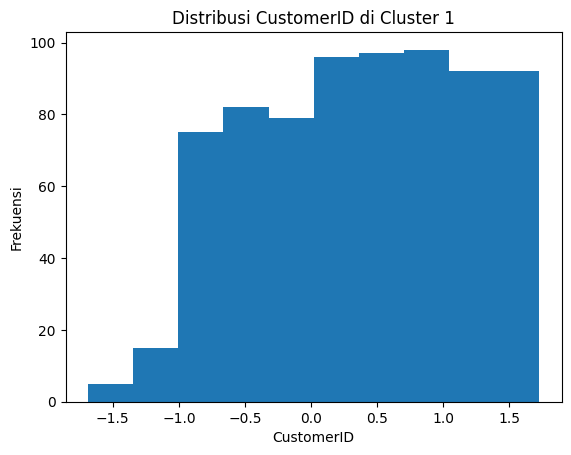

  - Gender:
    Mean: -0.0237161789689195
    Median: -0.8284567827047125
    Std Dev: 0.9958992062236762


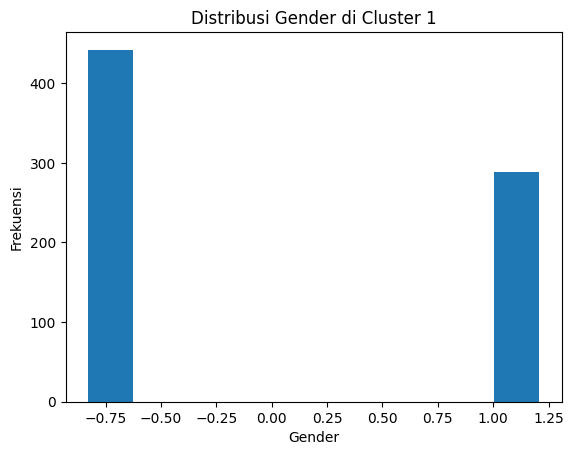

  - Annual Income ($):
    Mean: 0.1772014452907742
    Median: 0.15406672138834465
    Std Dev: 0.8806105787663647


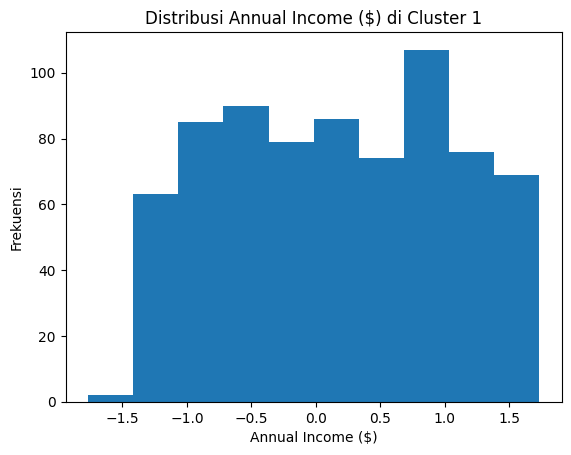

  - Family Size:
    Mean: 1.0881575613920647
    Median: 1.1325940764261662
    Std Dev: 0.4790767942501373


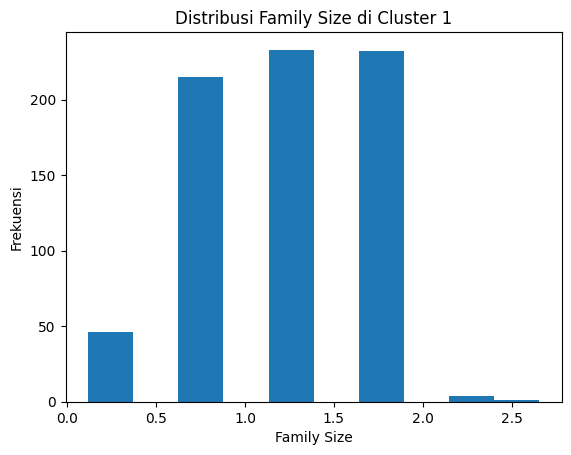

  - Cluster:
    Mean: 0.16901811607678907
    Median: 0.11749743611591194
    Std Dev: 1.0245496938948395


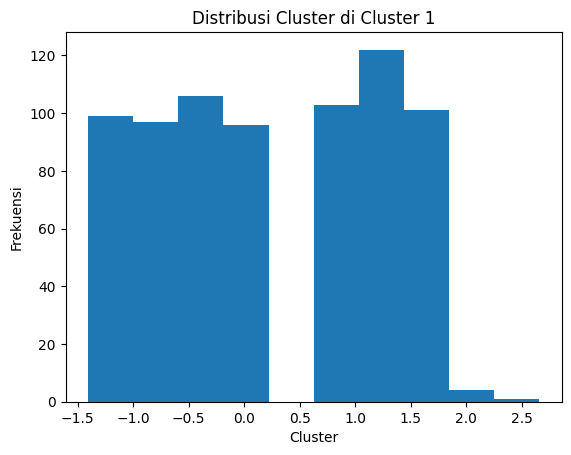


Karakteristik Cluster 0:
  - CustomerID:
    Mean: 0.43440900123210235
    Median: 0.5100890265901666
    Std Dev: 0.8265092163015133


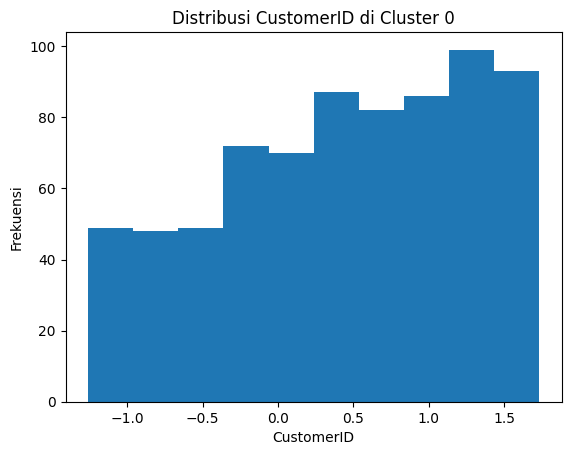

  - Gender:
    Mean: -0.01147922701135242
    Median: -0.8284567827047125
    Std Dev: 0.9984379856905871


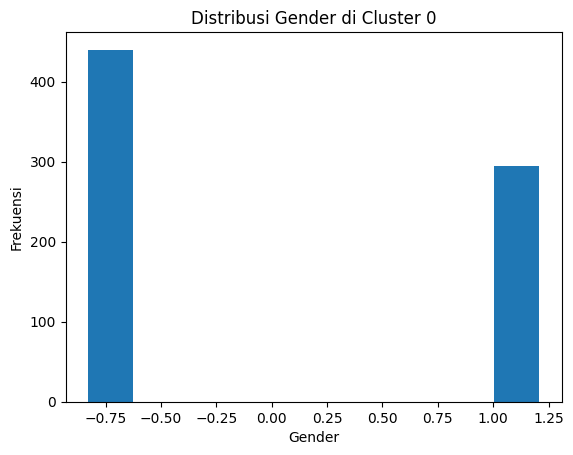

  - Annual Income ($):
    Mean: 0.5327226205886167
    Median: 0.6311256812268699
    Std Dev: 0.7869431581159945


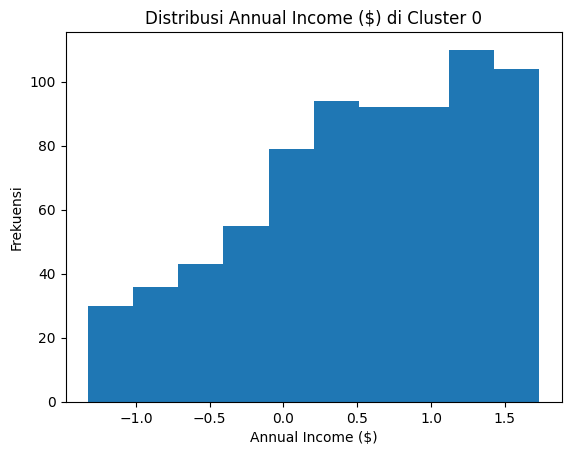

  - Family Size:
    Mean: -0.7111528825047037
    Median: -0.8975992041943422
    Std Dev: 0.5399852238254972


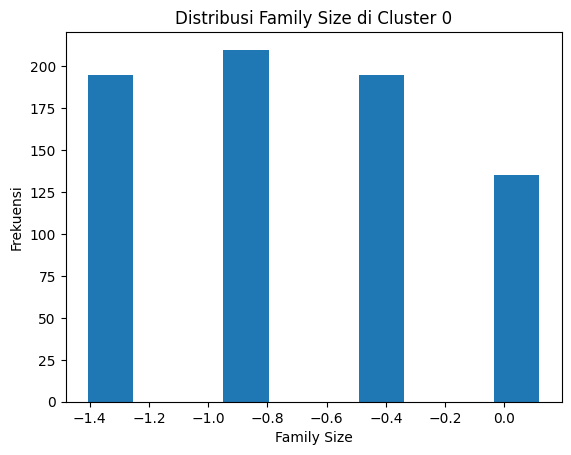

  - Cluster:
    Mean: 0.02678961900769689
    Median: 0.11749743611591194
    Std Dev: 1.0281158015867724


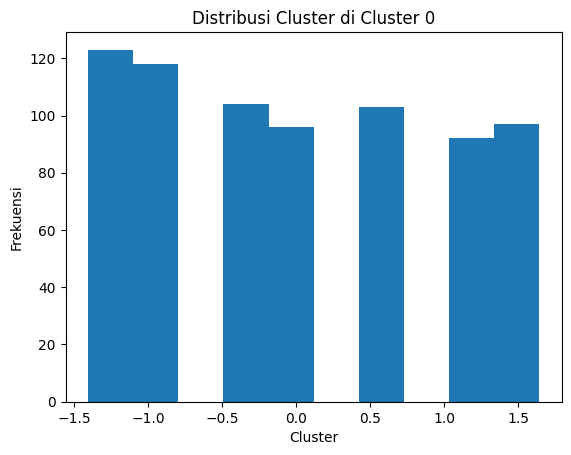

In [ ]:
for cluster_num in df_selected['Cluster_Selected'].unique():
    print(f"\nKarakteristik Cluster {cluster_num}:")
    cluster_data = df_selected[df_selected['Cluster_Selected'] == cluster_num]
    for col in selected_features.columns:
        print(f"  - {col}:")
        print(f"    Mean: {cluster_data[col].mean()}")
        print(f"    Median: {cluster_data[col].median()}")
        print(f"    Std Dev: {cluster_data[col].std()}")

        plt.figure()
        plt.hist(cluster_data[col], bins=10)
        plt.title(f'Distribusi {col} di Cluster {cluster_num}')
        plt.xlabel(col)
        plt.ylabel('Frekuensi')
        plt.show()


Tulis hasil interpretasinya di sini.
1. Cluster 1:
2. Cluster 2:
3. Cluster 3:

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [ ]:
# prompt: Simpan hasilnya ke dalam file CSV.

df_selected.to_csv('ujian_clustering.csv', index=False)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')